In [94]:
# classification (multi-output / label) / Regression

In [95]:
import seaborn as sns

In [96]:
mpg = sns.load_dataset('mpg')

In [97]:
import missingno

<AxesSubplot:>

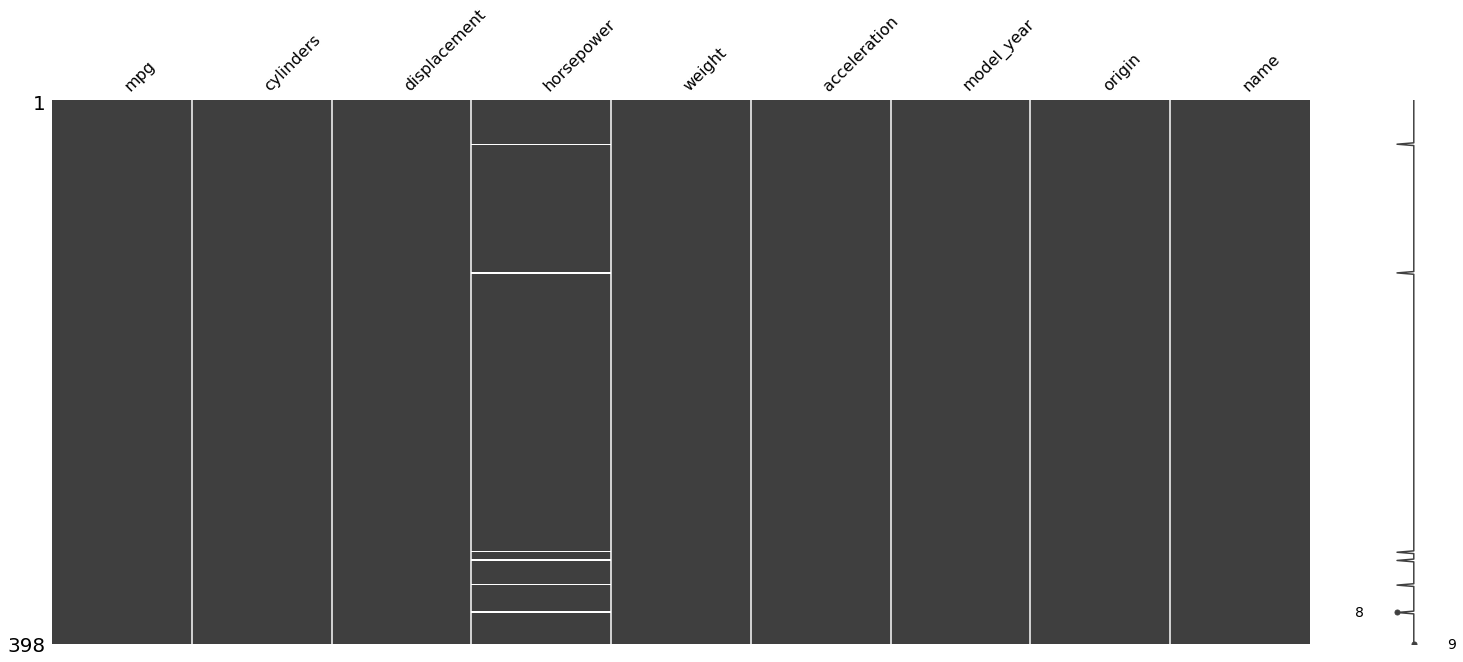

In [98]:
missingno.matrix(mpg)

In [99]:
mpg[mpg.horsepower.isna()]

mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl

In [100]:
from sklearn.impute import KNNImputer, SimpleImputer

In [101]:
mpg.drop(columns='name', inplace=True)

In [102]:
mpg

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin  
0            70     usa  
1            70     usa  
2            70     usa  
3            70     usa  
4            70     usa  
..          ...     ...  
393          82     usa  
394          82  europe  
395          82     usa  
396          82     usa  
397          82     usa  

[398 rows x 8 columns]

In [103]:
import pandas as pd

In [104]:
pd.get_dummies(mpg.origin)

europe  japan  usa
0         0      0    1
1         0      0    1
2         0      0    1
3         0      0    1
4         0      0    1
..      ...    ...  ...
393       0      0    1
394       1      0    0
395       0      0    1
396       0      0    1
397       0      0    1

[398 rows x 3 columns]

In [105]:
from sklearn.preprocessing import OneHotEncoder

In [106]:
ohe = OneHotEncoder()

In [107]:
ohe.fit_transform(mpg[['origin']]).toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [108]:
ohe.inverse_transform([[1,0,0]])

array([['europe']], dtype=object)

In [109]:
import tensorflow as tf

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
le = LabelEncoder()

In [112]:
le_orgin = le.fit_transform(mpg.origin)

In [113]:
tf.keras.utils.to_categorical(le_orgin)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [114]:
mpg['usa'] = (mpg.origin == 'usa')*1

In [115]:
mpg['europe'] = (mpg.origin == 'europe')*1

In [116]:
mpg['japan'] = (mpg.origin == 'japan')*1

In [117]:
mpg.drop(columns='origin', inplace=True)

In [118]:
mpg_raw = mpg.copy()

In [119]:
mpg.pop('usa')

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    0
395    1
396    1
397    1
Name: usa, Length: 398, dtype: int32

In [44]:
mpg = mpg_raw.copy()

In [122]:
mpg.dropna(inplace=True)

# eda 

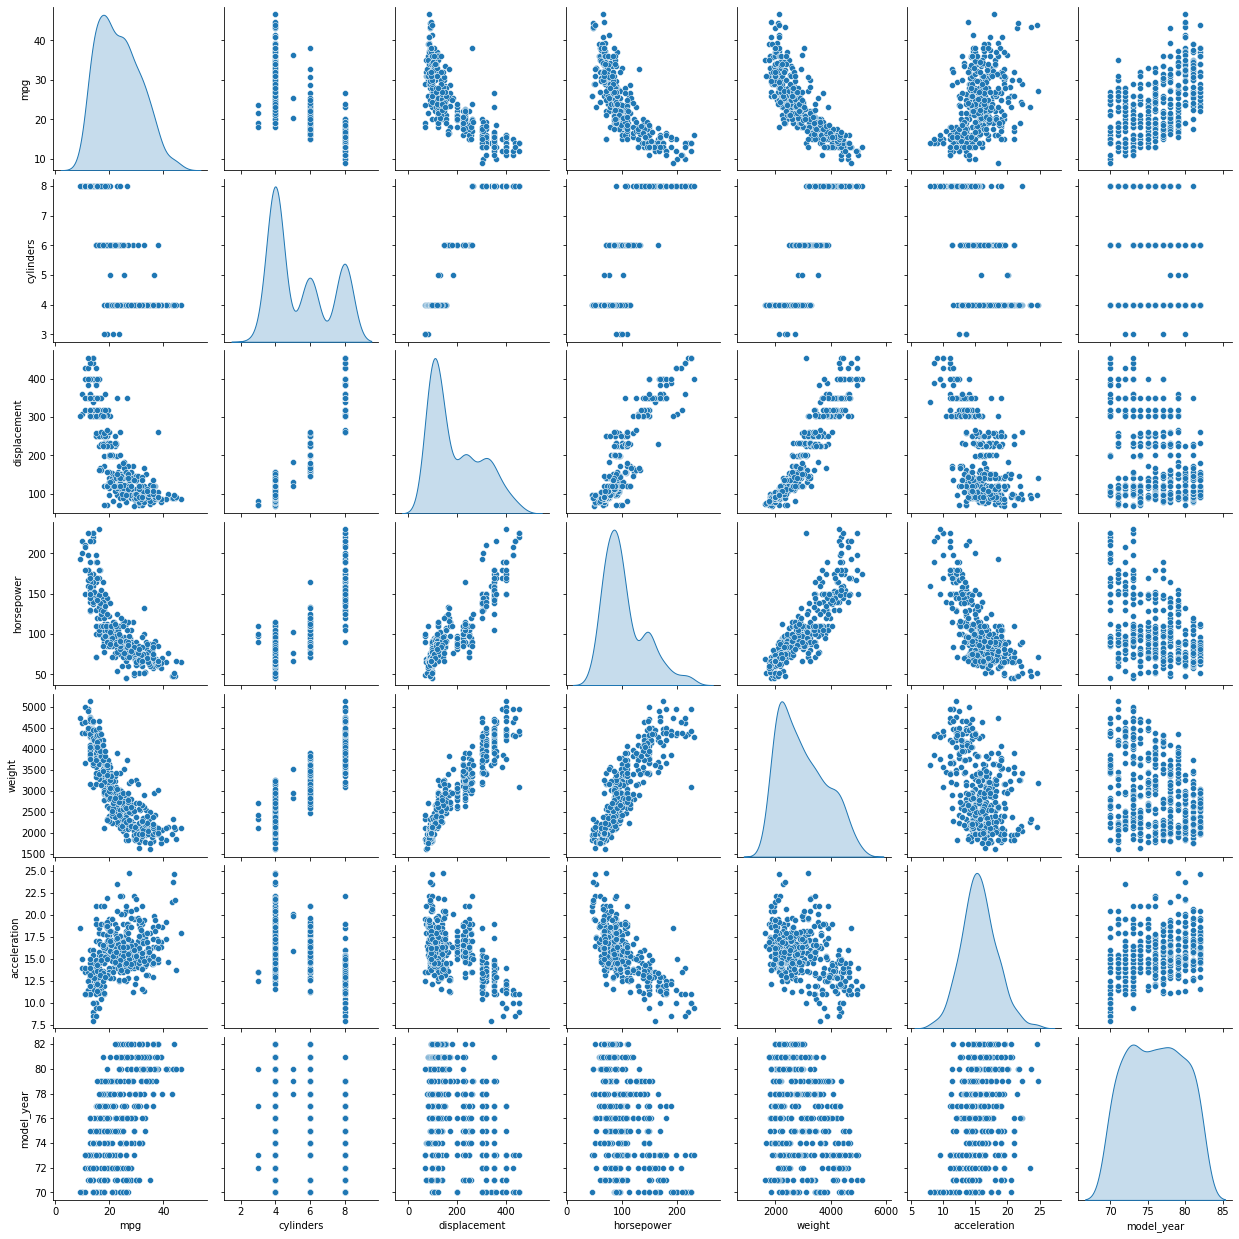

In [54]:
sns.pairplot(mpg.iloc[:,:-3], diag_kind='kde')

In [55]:
mpg.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year         usa      europe       japan  
count    398.000000  398.000000  398.000000  398.000000  398.000000  
mean      15.568090   76.010050    0.625628    0.175879    0.198492  
std        2.757689    3.697627    0.484569    0.381197    0.399367  
min        8.000000   70.000000    0.000000    0.000000    0.000000  
25%       13.825000   73.000000    0.000000    0.000000    0.000000  
50%       15.500000   76.000000    1.000000    0.000000    0.000000  
75%       17.175000   79.000000    1.000000    0.000000    0.000000  
max       24.800000   82.000000    1.000000    1.000000    1.000000

<AxesSubplot:>

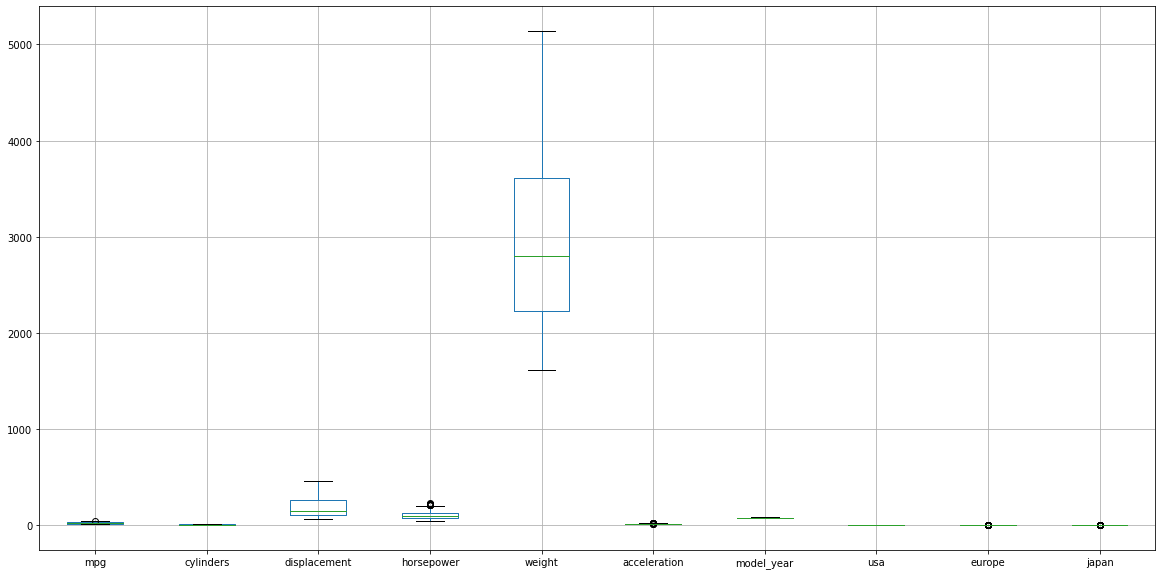

In [58]:
mpg.boxplot(figsize=(20,10))

In [59]:
mpg.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   
usa          -0.568192   0.604351      0.651407    0.489625  0.598398   
europe        0.259022  -0.352861     -0.373886   -0.284948 -0.298843   
japan         0.442174  -0.396479     -0.433505   -0.321936 -0.440817   

              acceleration  model_year       usa    europe     japan  
mpg               0.420289    0.579267 -0.568192  0.259022  0.442174  
cylinders        -0.505419   -0.348746  0.604351 -0.352861 -0.396479  
displacement     -0.543684   -0.370164  0.651407 -0.373886 -0.433505  
horsepower       -0.689196   -0.416361  0.489625 -0.284948 -0.321936  
weight           -0.417457   -0.306564  0.598398 -0.298843 -0.440817  
acceleration      1.000000    0.288137 -0.250806  0.204473  0.109144  
model_year        0.288137    1.000000 -0.139883 -0.024489  0.193101  
usa              -0.250806   -0.139883  1.000000 -0.597198 -0.643317  
europe            0.204473   -0.024489 -0.597198  1.000000 -0.229895  
japan             0.109144    0.193101 -0.643317 -0.229895  1.000000

In [61]:
import matplotlib.pyplot as plt

<AxesSubplot:>

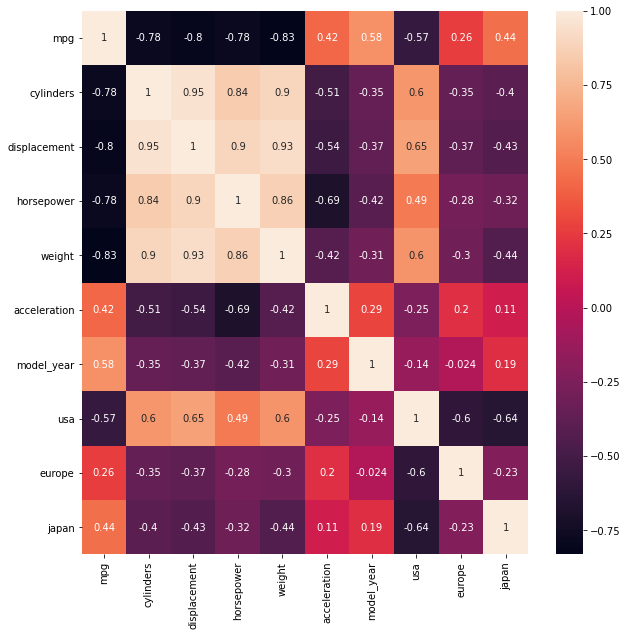

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(mpg.corr(), annot=True)

In [63]:
import pandas_profiling

In [64]:
pandas_profiling.ProfileReport(mpg)

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# holdout

In [49]:
train_ds = mpg.sample(frac=0.7)

In [51]:
test_ds  = mpg.drop(train_ds.index)

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,y_train,y_test = train_test_split(mpg.iloc[:,1:], mpg.mpg)

In [48]:
X_train

cylinders  displacement  horsepower  weight  acceleration  model_year  \
352          4          98.0        65.0    2380          20.7          81   
327          5         121.0        67.0    2950          19.9          80   
230          8         350.0       170.0    4165          11.4          77   
392          4         151.0        90.0    2950          17.3          82   
11           8         340.0       160.0    3609           8.0          70   
..         ...           ...         ...     ...           ...         ...   
228          6         250.0        98.0    3525          19.0          77   
245          4          98.0        66.0    1800          14.4          78   
61           4         122.0        86.0    2226          16.5          72   
156          8         400.0       170.0    4668          11.5          75   
282          4         140.0        88.0    2890          17.3          79   

     usa  europe  japan  
352    1       0      0  
327    0       1      0  
230    1       0      0  
392    1       0      0  
11     1       0      0  
..   ...     ...    ...  
228    1       0      0  
245    1       0      0  
61     1       0      0  
156    1       0      0  
282    1       0      0  

[298 rows x 9 columns]

In [69]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   usa           398 non-null    int32  
 8   europe        398 non-null    int32  
 9   japan         398 non-null    int32  
dtypes: float64(4), int32(3), int64(3)
memory usage: 26.6 KB


In [70]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'usa', 'europe', 'japan'],
      dtype='object')

In [ ]:
#

In [71]:
tf.nn.relu is tf.keras.activations.relu

False

In [75]:
high level : tf.keras.activations.relu([1,1,2,-1,3,-2])

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 1, 2, 0, 3, 0])>

In [74]:
low level : tf.nn.relu([1,1,2,-1,3,-2], name='rrr')

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 1, 2, 0, 3, 0])>

In [78]:
y = mpg.pop('mpg')

In [ ]:
tf.keras.layers.Input()

In [79]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Dense(16, activation=tf.nn.relu),
        tf.keras.layers.Dense(1)
    ])

In [ ]:
tf.keras.layers.InputLayer

In [129]:
def build():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(8,)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    return model

In [130]:
model = build()

In [131]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 462359.9375
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 302886.6250
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 185846.9062
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 104235.7656
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 52923.7227
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 24289.7891
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 9521.5762
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 3199.2610
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 837.9897
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 211.9328
